# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load and read the dataset

In [2]:
file_path = "/kaggle/input/mta-daily-ridership2/MTA_Daily_Ridership.csv"
df = pd.read_csv(file_path)

In [3]:
 df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Date                                                     1706 non-null   object
 1   Subways: Total Estimated Ridership                       1706 non-null   int64 
 2   Subways: % of Comparable Pre-Pandemic Day                1706 non-null   int64 
 3   Buses: Total Estimated Ridership                         1706 non-null   int64 
 4   Buses: % of Comparable Pre-Pandemic Day                  1706 non-null   int64 
 5   LIRR: Total Estimated Ridership                          1706 non-null   int64 
 6   LIRR: % of Comparable Pre-Pandemic Day                   1706 non-null   int64 
 7   Metro-North: Total Estimated Ridership                   1706 non-null   int64 
 8   Metro-North: % of Comparable Pre-Pande

# Missing Values

In [5]:
df.isnull().sum()


Date                                                       0
Subways: Total Estimated Ridership                         0
Subways: % of Comparable Pre-Pandemic Day                  0
Buses: Total Estimated Ridership                           0
Buses: % of Comparable Pre-Pandemic Day                    0
LIRR: Total Estimated Ridership                            0
LIRR: % of Comparable Pre-Pandemic Day                     0
Metro-North: Total Estimated Ridership                     0
Metro-North: % of Comparable Pre-Pandemic Day              0
Access-A-Ride: Total Scheduled Trips                       0
Access-A-Ride: % of Comparable Pre-Pandemic Day            0
Bridges and Tunnels: Total Traffic                         0
Bridges and Tunnels: % of Comparable Pre-Pandemic Day      0
Staten Island Railway: Total Estimated Ridership           0
Staten Island Railway: % of Comparable Pre-Pandemic Day    0
dtype: int64

In [6]:
df.describe()


,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
count,1.706000e+03,1706.000000,1.706000e+03,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1.706000e+03,1706.000000,1706.000000,1706.000000
mean,2.509055e+06,55.461313,1.006868e+06,54.692849,135960.116061,59.128370,114888.273154,51.083236,21941.532825,86.165299,8.556029e+05,93.375147,4429.355217,37.811254
std,1.062184e+06,19.819596,4.403799e+05,19.293307,71298.778711,29.297993,66500.207696,26.137311,7990.634806,24.645063,1.431840e+05,14.641962,2681.655564,19.273205
min,1.983990e+05,7.000000,5.498000e+03,1.000000,1903.000000,2.000000,3281.000000,3.000000,2506.000000,13.000000,1.567590e+05,18.000000,0.000000,0.000000
25%,1.715396e+06,40.000000,7.152495e+05,53.000000,78689.750000,37.000000,51271.250000,29.000000,15869.500000,72.000000,8.103385e+05,90.000000,2077.250000,24.000000
50%,2.459607e+06,61.000000,1.140776e+06,60.000000,124274.000000,60.000000,108237.000000,56.000000,22301.500000,84.000000,8.966345e+05,97.000000,4522.500000,40.000000
75%,3.440053e+06,69.000000,1.347620e+06,65.000000,197928.000000,76.000000,176789.750000,71.000000,27506.750000,104.000000,9.473308e+05,102.000000,6812.750000,47.000000
max,5.498809e+06,143.000000,2.244515e+06,126.000000,321569.000000,237.000000,249585.000000,193.000000,40468.000000,144.000000,1.043802e+06,120.000000,17453.000000,182.000000


# Add day of week and weekend indicator

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
df = df.dropna(subset=['Date'])

In [9]:
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

In [10]:
df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,day_of_week,month,year,is_weekend
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52,Sunday,March,2020,True
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107,Monday,March,2020,False
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109,Tuesday,March,2020,False
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107,Wednesday,March,2020,False
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108,Thursday,March,2020,False


# Normalize column names

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [12]:
df.head()

,date,subways:_total_estimated_ridership,subways:_%_of_comparable_pre-pandemic_day,buses:_total_estimated_ridership,buses:_%_of_comparable_pre-pandemic_day,lirr:_total_estimated_ridership,lirr:_%_of_comparable_pre-pandemic_day,metro-north:_total_estimated_ridership,metro-north:_%_of_comparable_pre-pandemic_day,access-a-ride:_total_scheduled_trips,access-a-ride:_%_of_comparable_pre-pandemic_day,bridges_and_tunnels:_total_traffic,bridges_and_tunnels:_%_of_comparable_pre-pandemic_day,staten_island_railway:_total_estimated_ridership,staten_island_railway:_%_of_comparable_pre-pandemic_day,day_of_week,month,year,is_weekend
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52,Sunday,March,2020,True
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107,Monday,March,2020,False
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109,Tuesday,March,2020,False
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107,Wednesday,March,2020,False
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108,Thursday,March,2020,False


In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '')


In [14]:
df.head()

,date,subways_total_estimated_ridership,subways_%_of_comparable_pre-pandemic_day,buses_total_estimated_ridership,buses_%_of_comparable_pre-pandemic_day,lirr_total_estimated_ridership,lirr_%_of_comparable_pre-pandemic_day,metro-north_total_estimated_ridership,metro-north_%_of_comparable_pre-pandemic_day,access-a-ride_total_scheduled_trips,access-a-ride_%_of_comparable_pre-pandemic_day,bridges_and_tunnels_total_traffic,bridges_and_tunnels_%_of_comparable_pre-pandemic_day,staten_island_railway_total_estimated_ridership,staten_island_railway_%_of_comparable_pre-pandemic_day,day_of_week,month,year,is_weekend
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52,Sunday,March,2020,True
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107,Monday,March,2020,False
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109,Tuesday,March,2020,False
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107,Wednesday,March,2020,False
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108,Thursday,March,2020,False


In [15]:
modes = [
    'subways_total_estimated_ridership',
    'buses_total_estimated_ridership',
    'lirr_total_estimated_ridership',
    'metro-north_total_estimated_ridership',
    'access-a-ride_total_scheduled_trips',
    'bridges_and_tunnels_total_traffic'
]


# Total ridership column

In [16]:
df['total_ridership'] = df[modes].sum(axis=1)

In [17]:
df.head()

,date,subways_total_estimated_ridership,subways_%_of_comparable_pre-pandemic_day,buses_total_estimated_ridership,buses_%_of_comparable_pre-pandemic_day,lirr_total_estimated_ridership,lirr_%_of_comparable_pre-pandemic_day,metro-north_total_estimated_ridership,metro-north_%_of_comparable_pre-pandemic_day,access-a-ride_total_scheduled_trips,access-a-ride_%_of_comparable_pre-pandemic_day,bridges_and_tunnels_total_traffic,bridges_and_tunnels_%_of_comparable_pre-pandemic_day,staten_island_railway_total_estimated_ridership,staten_island_railway_%_of_comparable_pre-pandemic_day,day_of_week,month,year,is_weekend,total_ridership
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52,Sunday,March,2020,True,4147370
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107,Monday,March,2020,False,8946208
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109,Tuesday,March,2020,False,9135028
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107,Wednesday,March,2020,False,9120180
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108,Thursday,March,2020,False,9205458


# 1-Which modes of transportation (Subway, Bus, LIRR, etc.) recovered fastest post-COVID?

# Normalize ridership by max (to see relative recovery)

In [18]:
df_norm = df.copy()
for mode in modes:
    df_norm[mode] = df[mode] / df[mode].max()

df_norm_long = df_norm.melt(id_vars='date', value_vars=modes, var_name='mode', value_name='normalized_ridership')

In [19]:
import warnings
warnings.filterwarnings('ignore')


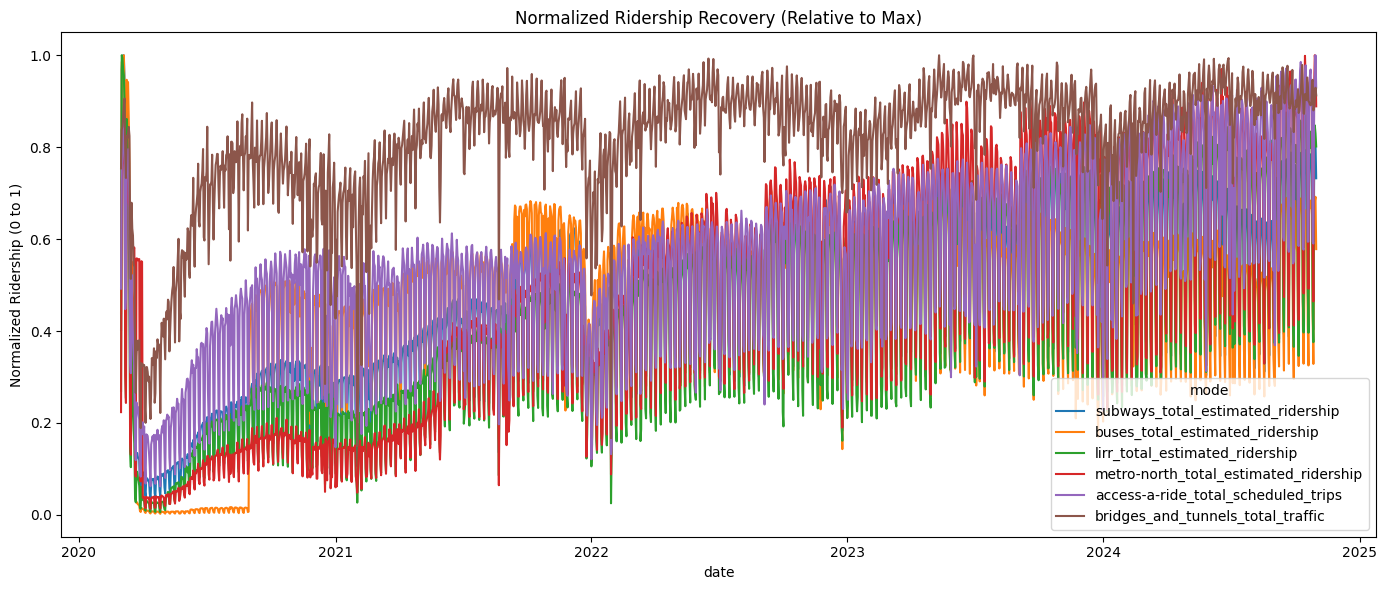

In [20]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_norm_long, x='date', y='normalized_ridership', hue='mode')
plt.title('Normalized Ridership Recovery (Relative to Max)')
plt.ylabel('Normalized Ridership (0 to 1)')
plt.tight_layout()
plt.show()

# 2-Are weekends seeing more/less ridership compared to weekdays?

In [21]:
weekend_avg = df.groupby('is_weekend')[modes].mean().T
weekend_avg.columns = ['Weekday', 'Weekend']

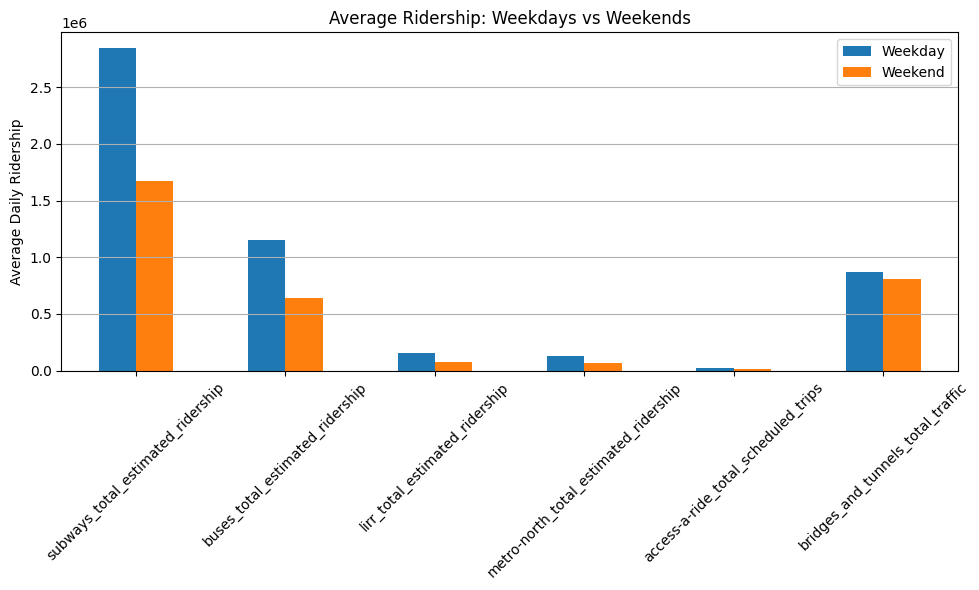

In [22]:
weekend_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Ridership: Weekdays vs Weekends')
plt.ylabel('Average Daily Ridership')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3-Which transportation mode had the least drop in usage?

# Assuming we define pandemic start as March 15, 2020

In [23]:
pre_covid = df[df['date'] < '2020-03-15']
post_covid = df[df['date'] >= '2020-03-15']

drop_ratios = {}
for mode in modes:
    before = pre_covid[mode].mean()
    after = post_covid[mode].mean()
    drop_ratios[mode] = after / before

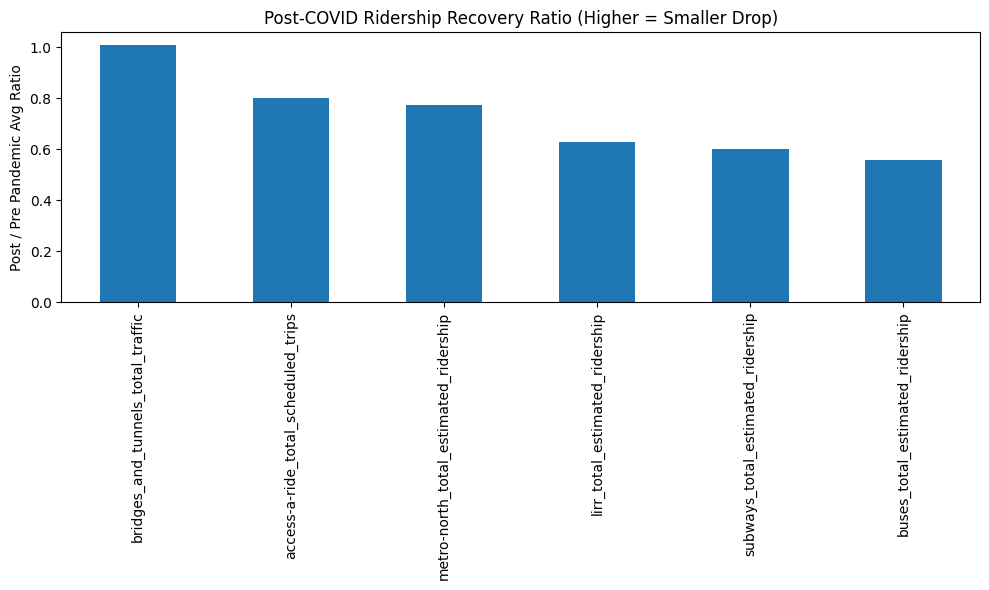

In [24]:
pd.Series(drop_ratios).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Post-COVID Ridership Recovery Ratio (Higher = Smaller Drop)')
plt.ylabel('Post / Pre Pandemic Avg Ratio')
plt.tight_layout()
plt.show()

# 4-What's the relationship between Access-A-Ride and Subway ridership?

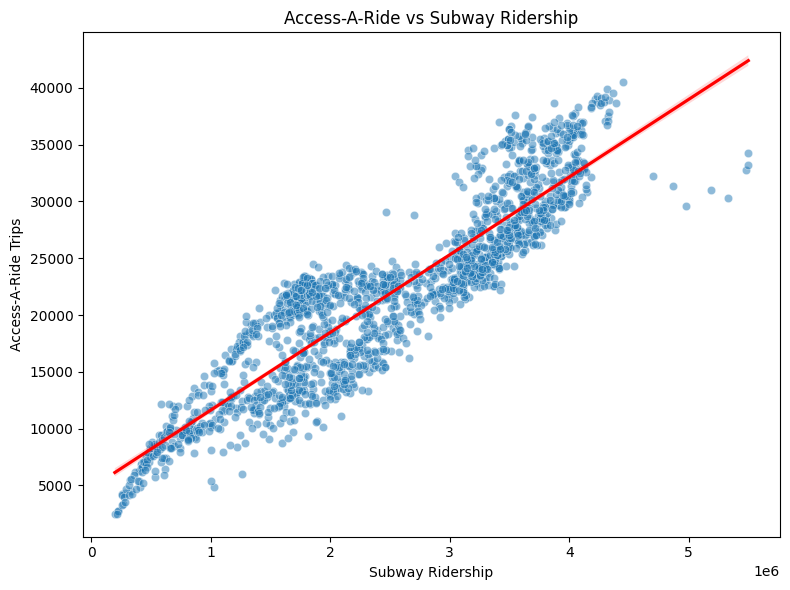

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='subways_total_estimated_ridership', y='access-a-ride_total_scheduled_trips', alpha=0.5)
sns.regplot(data=df, x='subways_total_estimated_ridership', y='access-a-ride_total_scheduled_trips', scatter=False, color='red')
plt.title('Access-A-Ride vs Subway Ridership')
plt.xlabel('Subway Ridership')
plt.ylabel('Access-A-Ride Trips')
plt.tight_layout()
plt.show()

In [26]:
## Access-A-Ride (AAR) Paratransit Service provides public transportation for eligible customers with disabilities 
## or health conditions that prevent them from using the public buses and subways for some or all of their trips

# Correlation

In [27]:
cor = df['subways_total_estimated_ridership'].corr(df['access-a-ride_total_scheduled_trips'])
print(f"Correlation: {cor:.2f}")

Correlation: 0.91


# 5-How has seasonality affected ridership (e.g., winter vs. summer)?

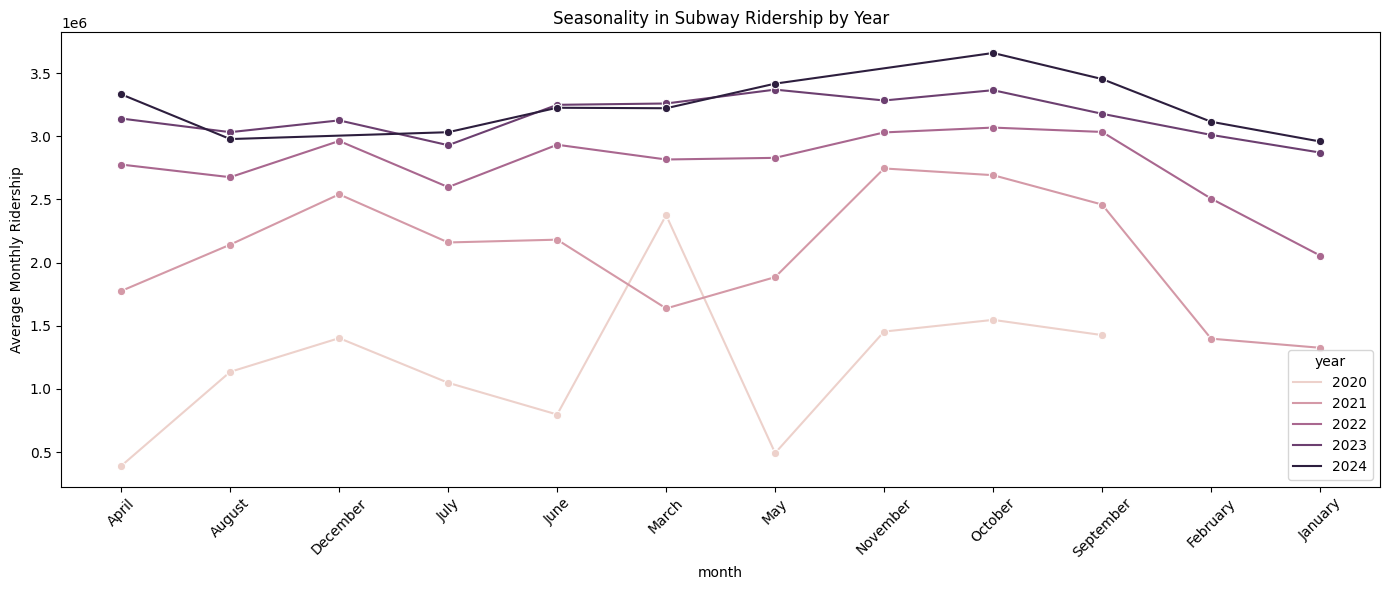

In [28]:
monthly_avg = df.groupby(['year', 'month'])[modes].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='month', y='subways_total_estimated_ridership', hue='year', marker='o')
plt.title('Seasonality in Subway Ridership by Year')
plt.ylabel('Average Monthly Ridership')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6-Which days or months have the highest and lowest ridership?

# Average by day of week

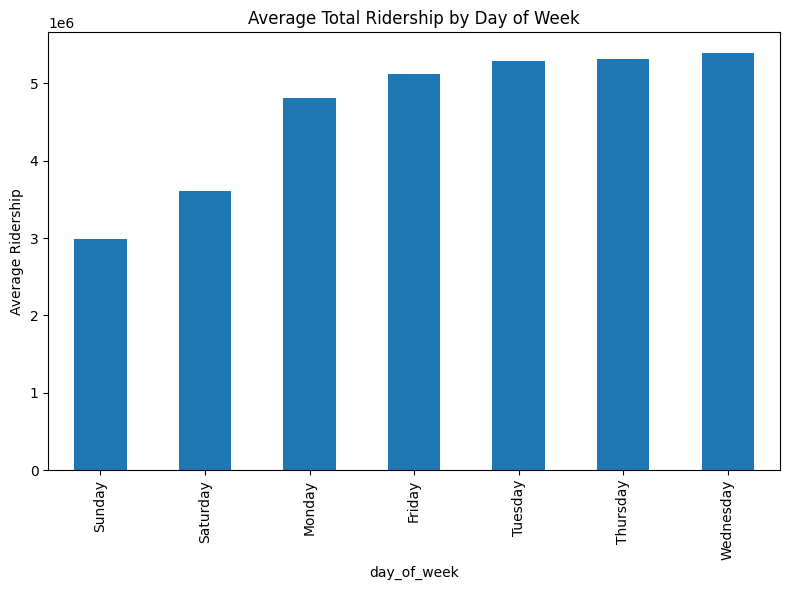

In [29]:
dow_avg = df.groupby('day_of_week')['total_ridership'].mean().sort_values()

plt.figure(figsize=(8, 6))
dow_avg.plot(kind='bar')
plt.title('Average Total Ridership by Day of Week')
plt.ylabel('Average Ridership')
plt.tight_layout()
plt.show()

# Average by month

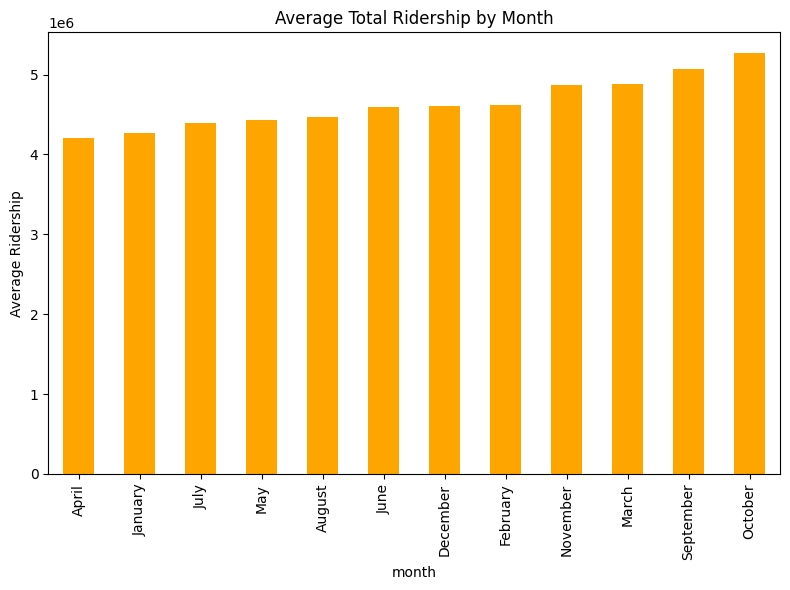

In [30]:
month_avg = df.groupby('month')['total_ridership'].mean().sort_values()

plt.figure(figsize=(8, 6))
month_avg.plot(kind='bar', color='orange')
plt.title('Average Total Ridership by Month')
plt.ylabel('Average Ridership')
plt.tight_layout()
plt.show()

# Correlation Matrix for All Modes

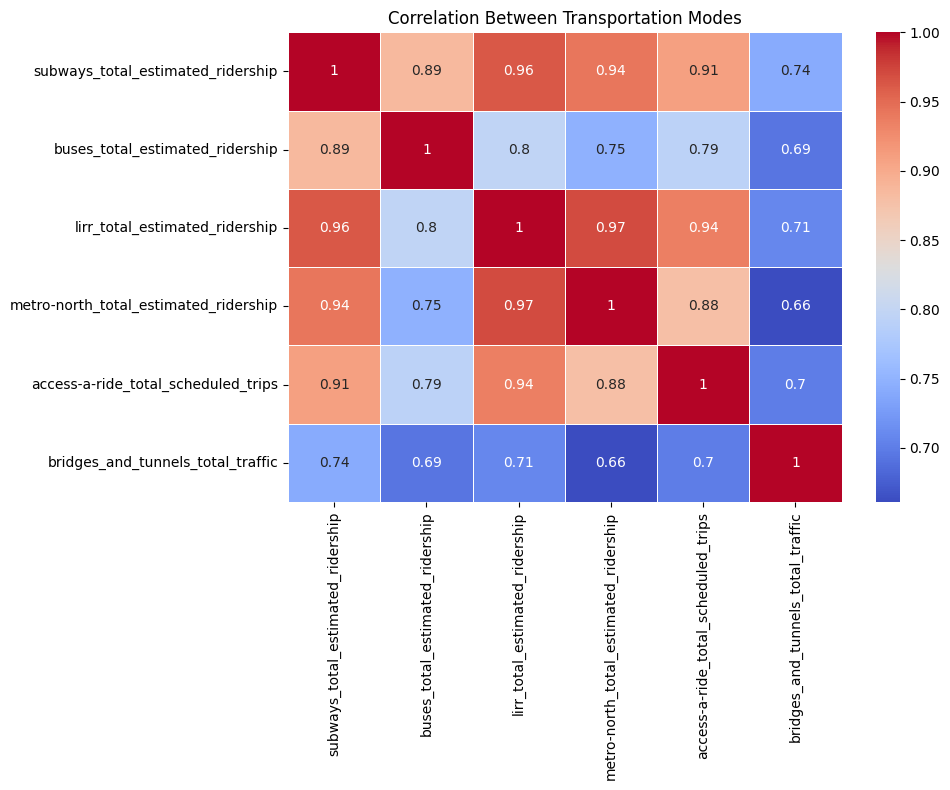

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[modes].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Transportation Modes')
plt.tight_layout()
plt.show()